<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-28 12:39:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.1MB/s    in 2.4s    

2025-06-28 12:39:22 (63.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



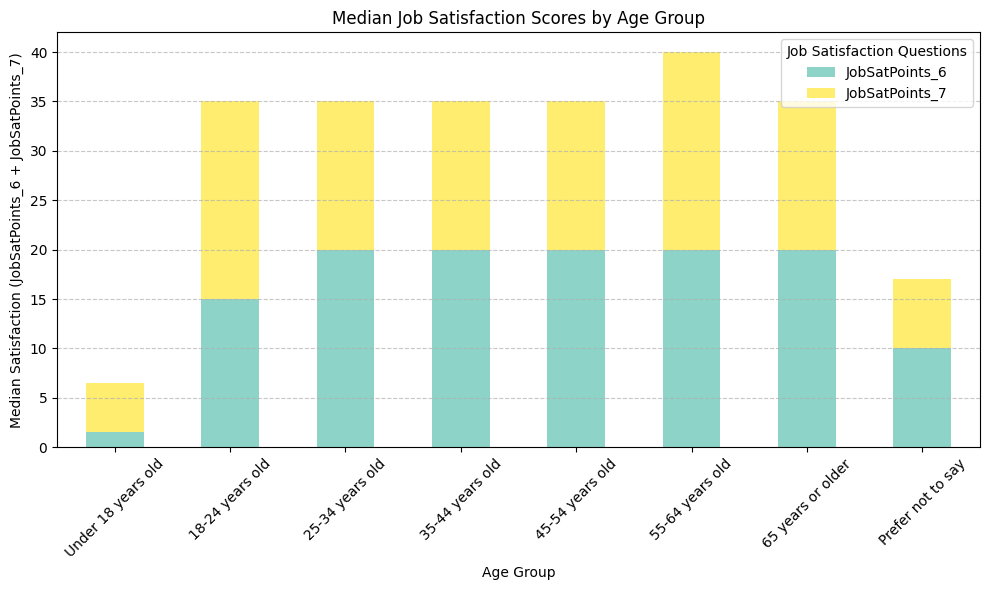

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Filter relevant columns
cols = ['Age', 'JobSatPoints_6', 'JobSatPoints_7']
df_filtered = df[cols].dropna()

# Group by Age and calculate median of satisfaction scores
grouped = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort age categories logically
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', 
             '65 years or older', 'Prefer not to say']
grouped = grouped.reindex(age_order)

# Plotting
ax = grouped.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')

plt.title("Median Job Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Satisfaction (JobSatPoints_6 + JobSatPoints_7)")
plt.xticks(rotation=45)
plt.legend(title="Job Satisfaction Questions")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_1544/1732082216.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


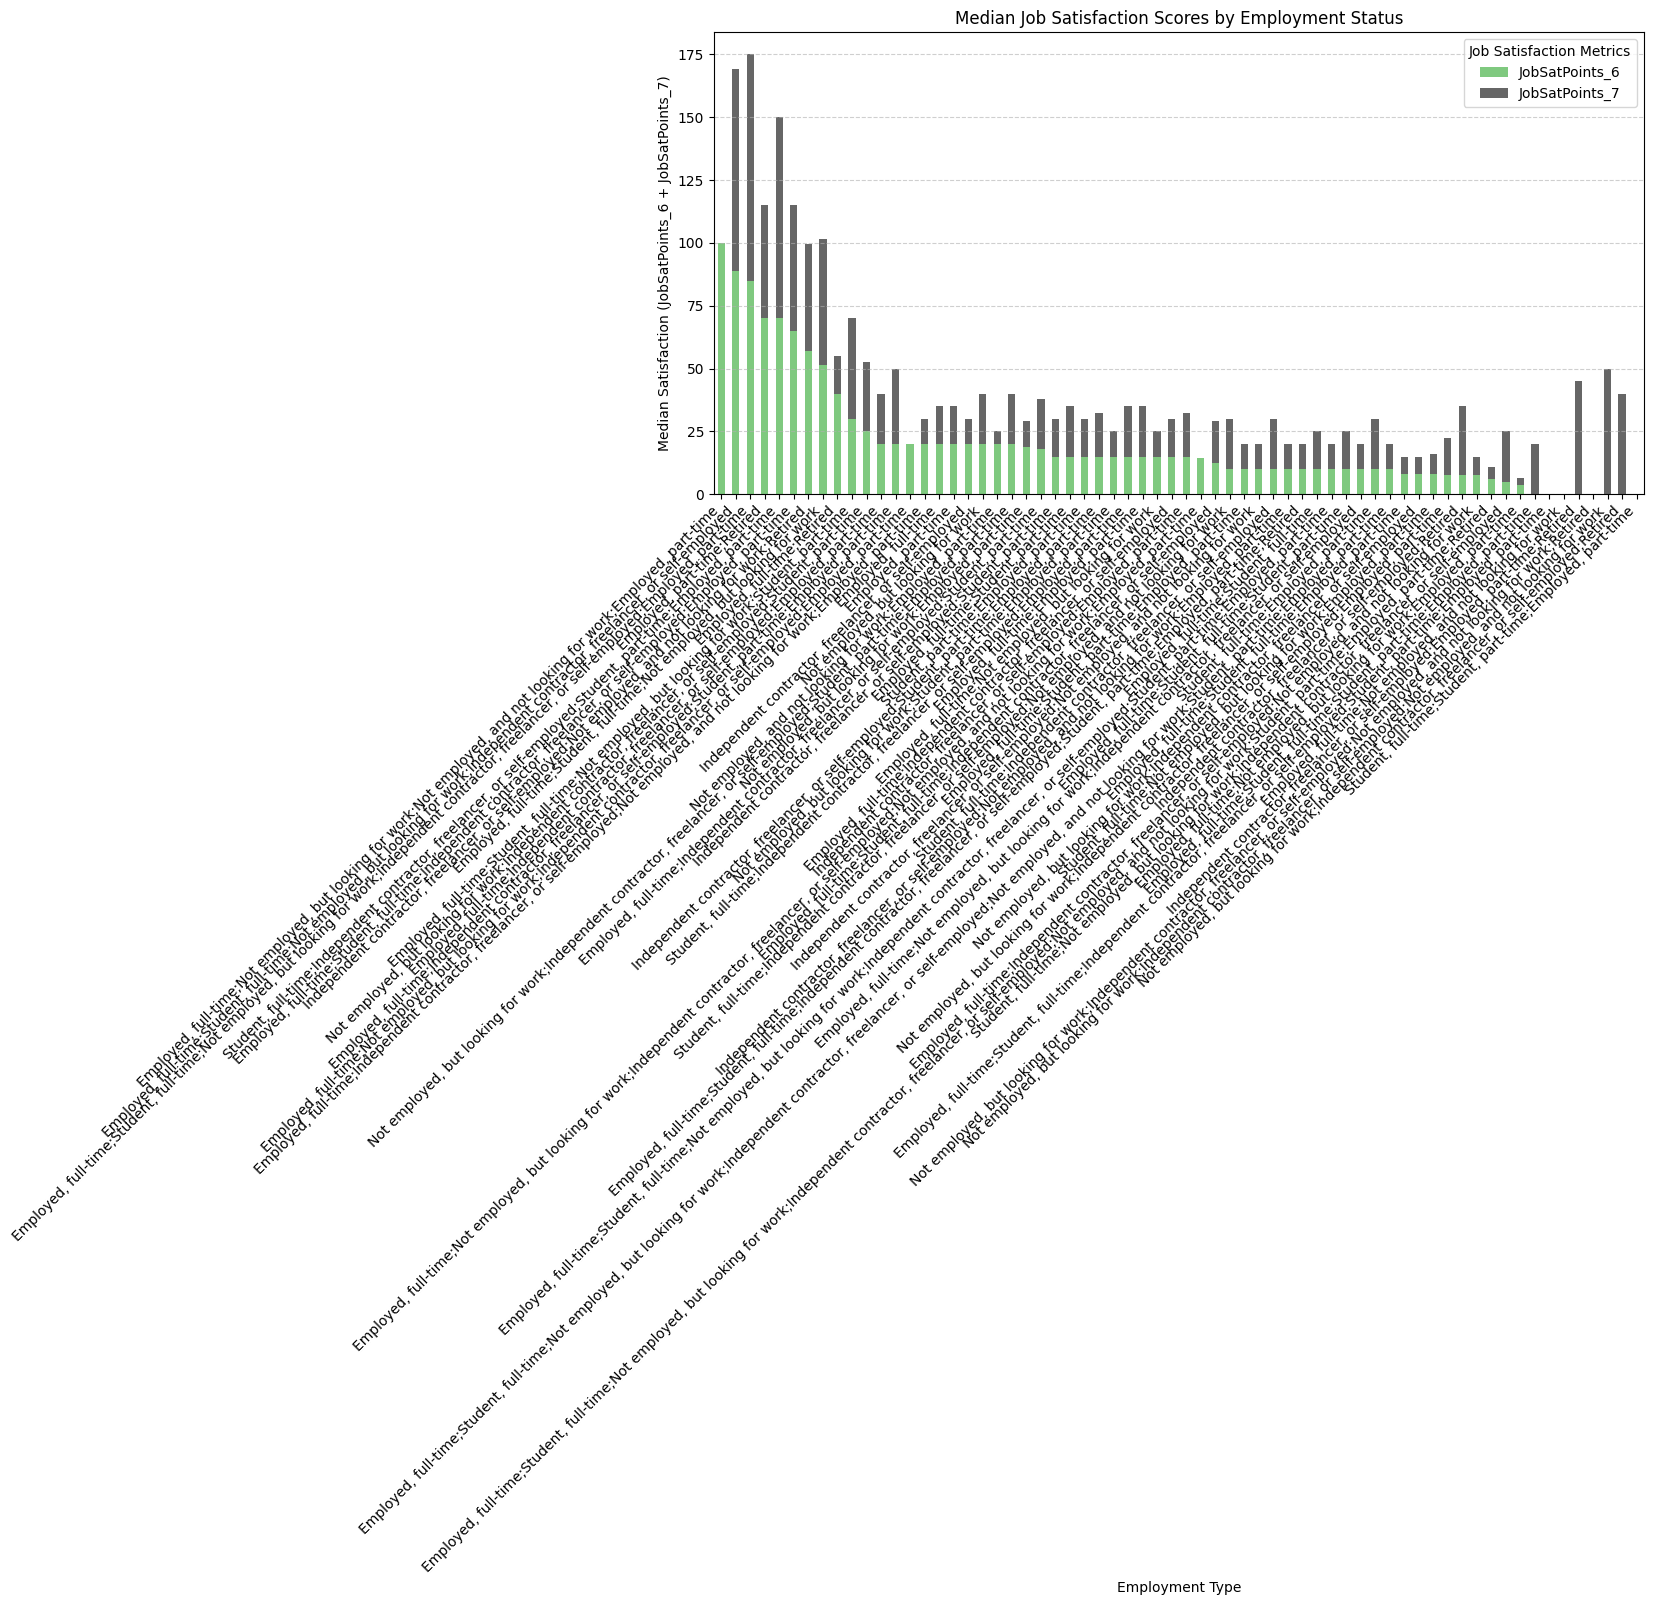

In [8]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Select relevant columns and drop rows with missing values
cols = ['Employment', 'JobSatPoints_6', 'JobSatPoints_7']
df_filtered = df[cols].dropna()

# Group by Employment status and compute median satisfaction scores
grouped = df_filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Optional: sort by JobSatPoints_6 if you want more structured visualization
grouped = grouped.sort_values(by='JobSatPoints_6', ascending=False)

# Plotting
ax = grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent')

plt.title("Median Job Satisfaction Scores by Employment Status")
plt.xlabel("Employment Type")
plt.ylabel("Median Satisfaction (JobSatPoints_6 + JobSatPoints_7)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Job Satisfaction Metrics")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_1544/3270548618.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_filtered.groupby(comp_bins).agg({


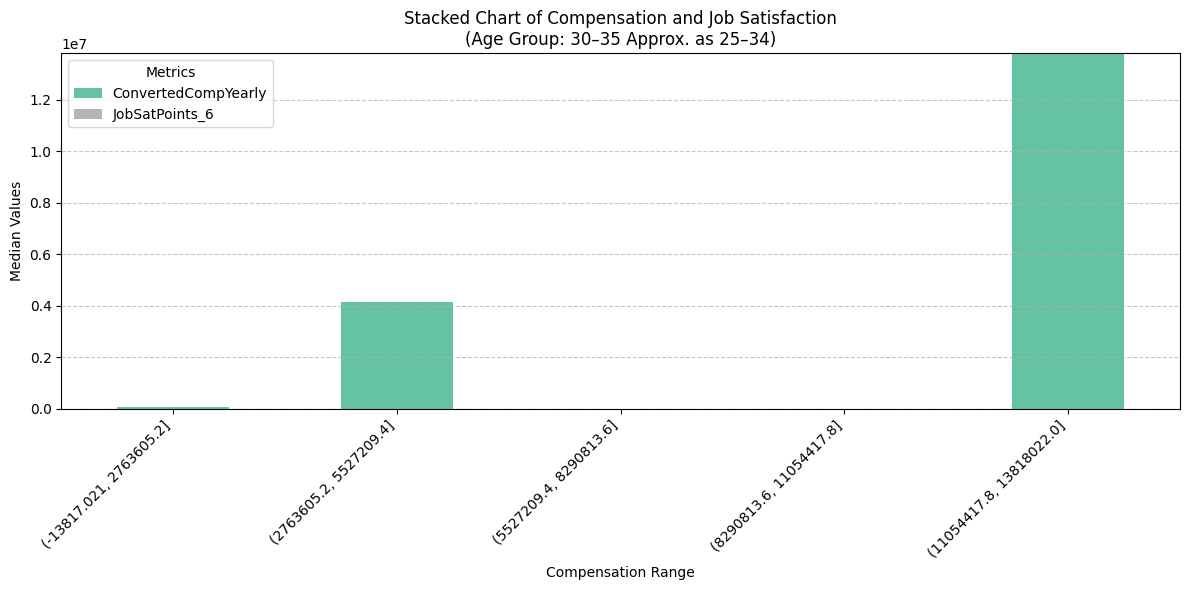

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Filter for age group "25-34 years old" as an approximation for 30–35
df_filtered = df[df['Age'] == '25-34 years old']

# Drop rows with missing compensation or job satisfaction values
df_filtered = df_filtered[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Create bins for compensation (for clearer visualization)
comp_bins = pd.cut(df_filtered['ConvertedCompYearly'], bins=5)

# Group by compensation bins and compute median job satisfaction
grouped = df_filtered.groupby(comp_bins).agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
})

# Plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title("Stacked Chart of Compensation and Job Satisfaction\n(Age Group: 30–35 Approx. as 25–34)")
plt.xlabel("Compensation Range")
plt.ylabel("Median Values")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


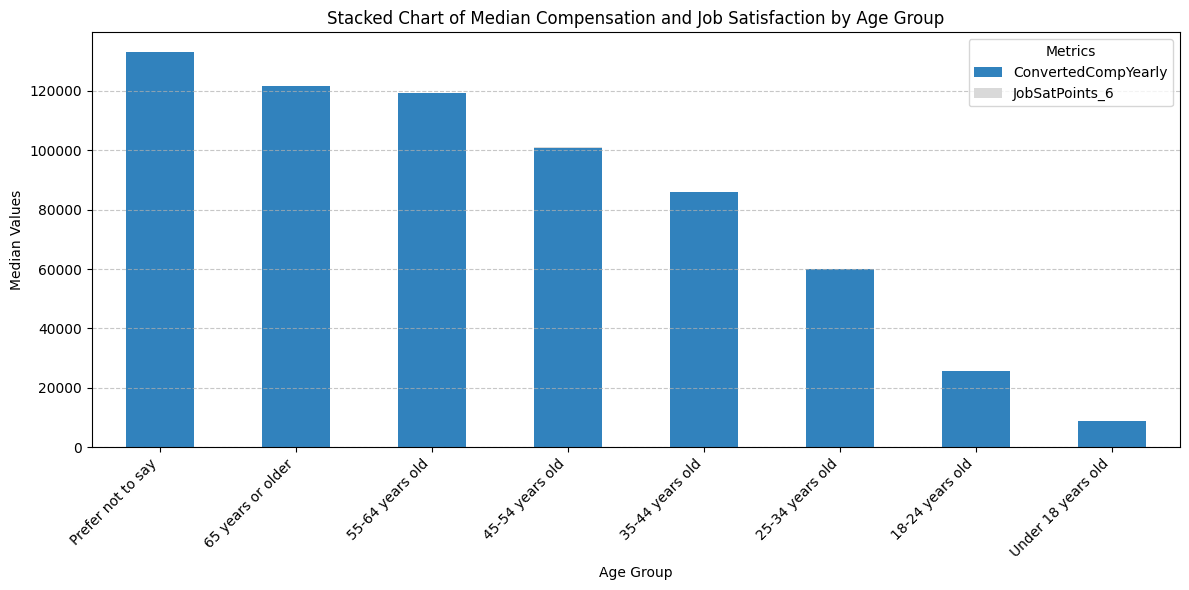

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Filter necessary columns and drop missing values
df_filtered = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Group by Age and calculate the median for both metrics
grouped = df_filtered.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).sort_values(by='ConvertedCompYearly', ascending=False)

# Plot a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.title("Stacked Chart of Median Compensation and Job Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Values")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


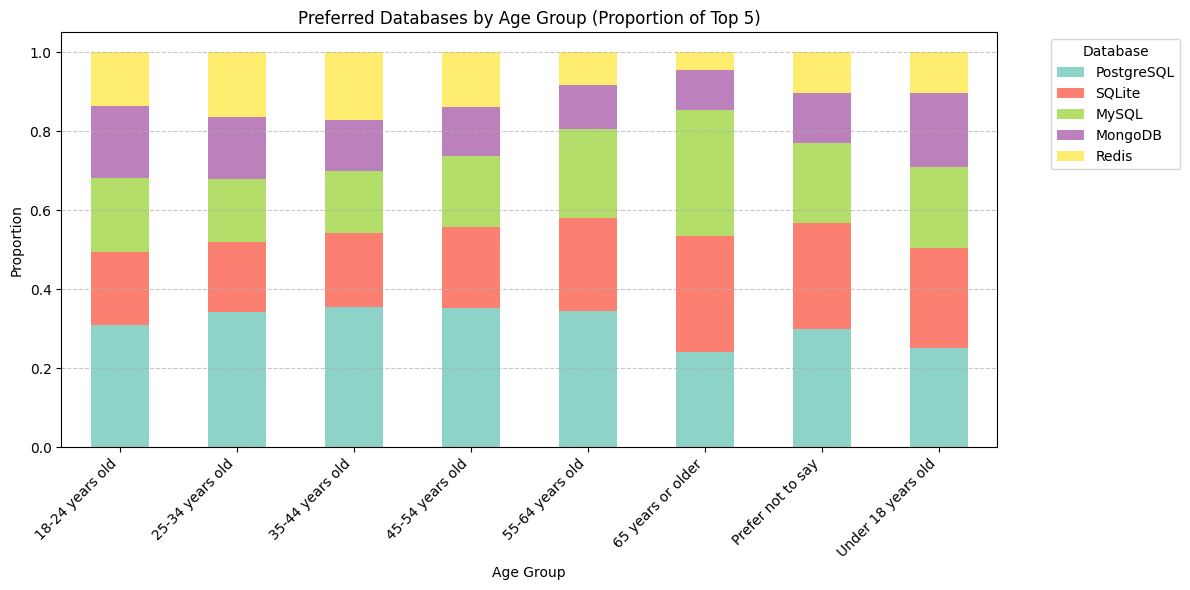

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop missing values in relevant columns
df_db = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Split semicolon-separated values into lists
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')

# Explode to flatten
df_exploded = df_db.explode('DatabaseWantToWorkWith')

# Group and count
db_counts = df_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

# Pivot for stacked bar chart
db_pivot = db_counts.pivot(index='Age', columns='DatabaseWantToWorkWith', values='Count').fillna(0)

# Select top 5 databases overall to focus the chart
top5_databases = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5).index
db_pivot_top5 = db_pivot[top5_databases]

# Normalize to show proportions (optional, remove this line for raw counts)
db_pivot_top5_prop = db_pivot_top5.div(db_pivot_top5.sum(axis=1), axis=0)

# Plot stacked bar chart
db_pivot_top5_prop.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title("Preferred Databases by Age Group (Proportion of Top 5)")
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_1544/3473122296.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


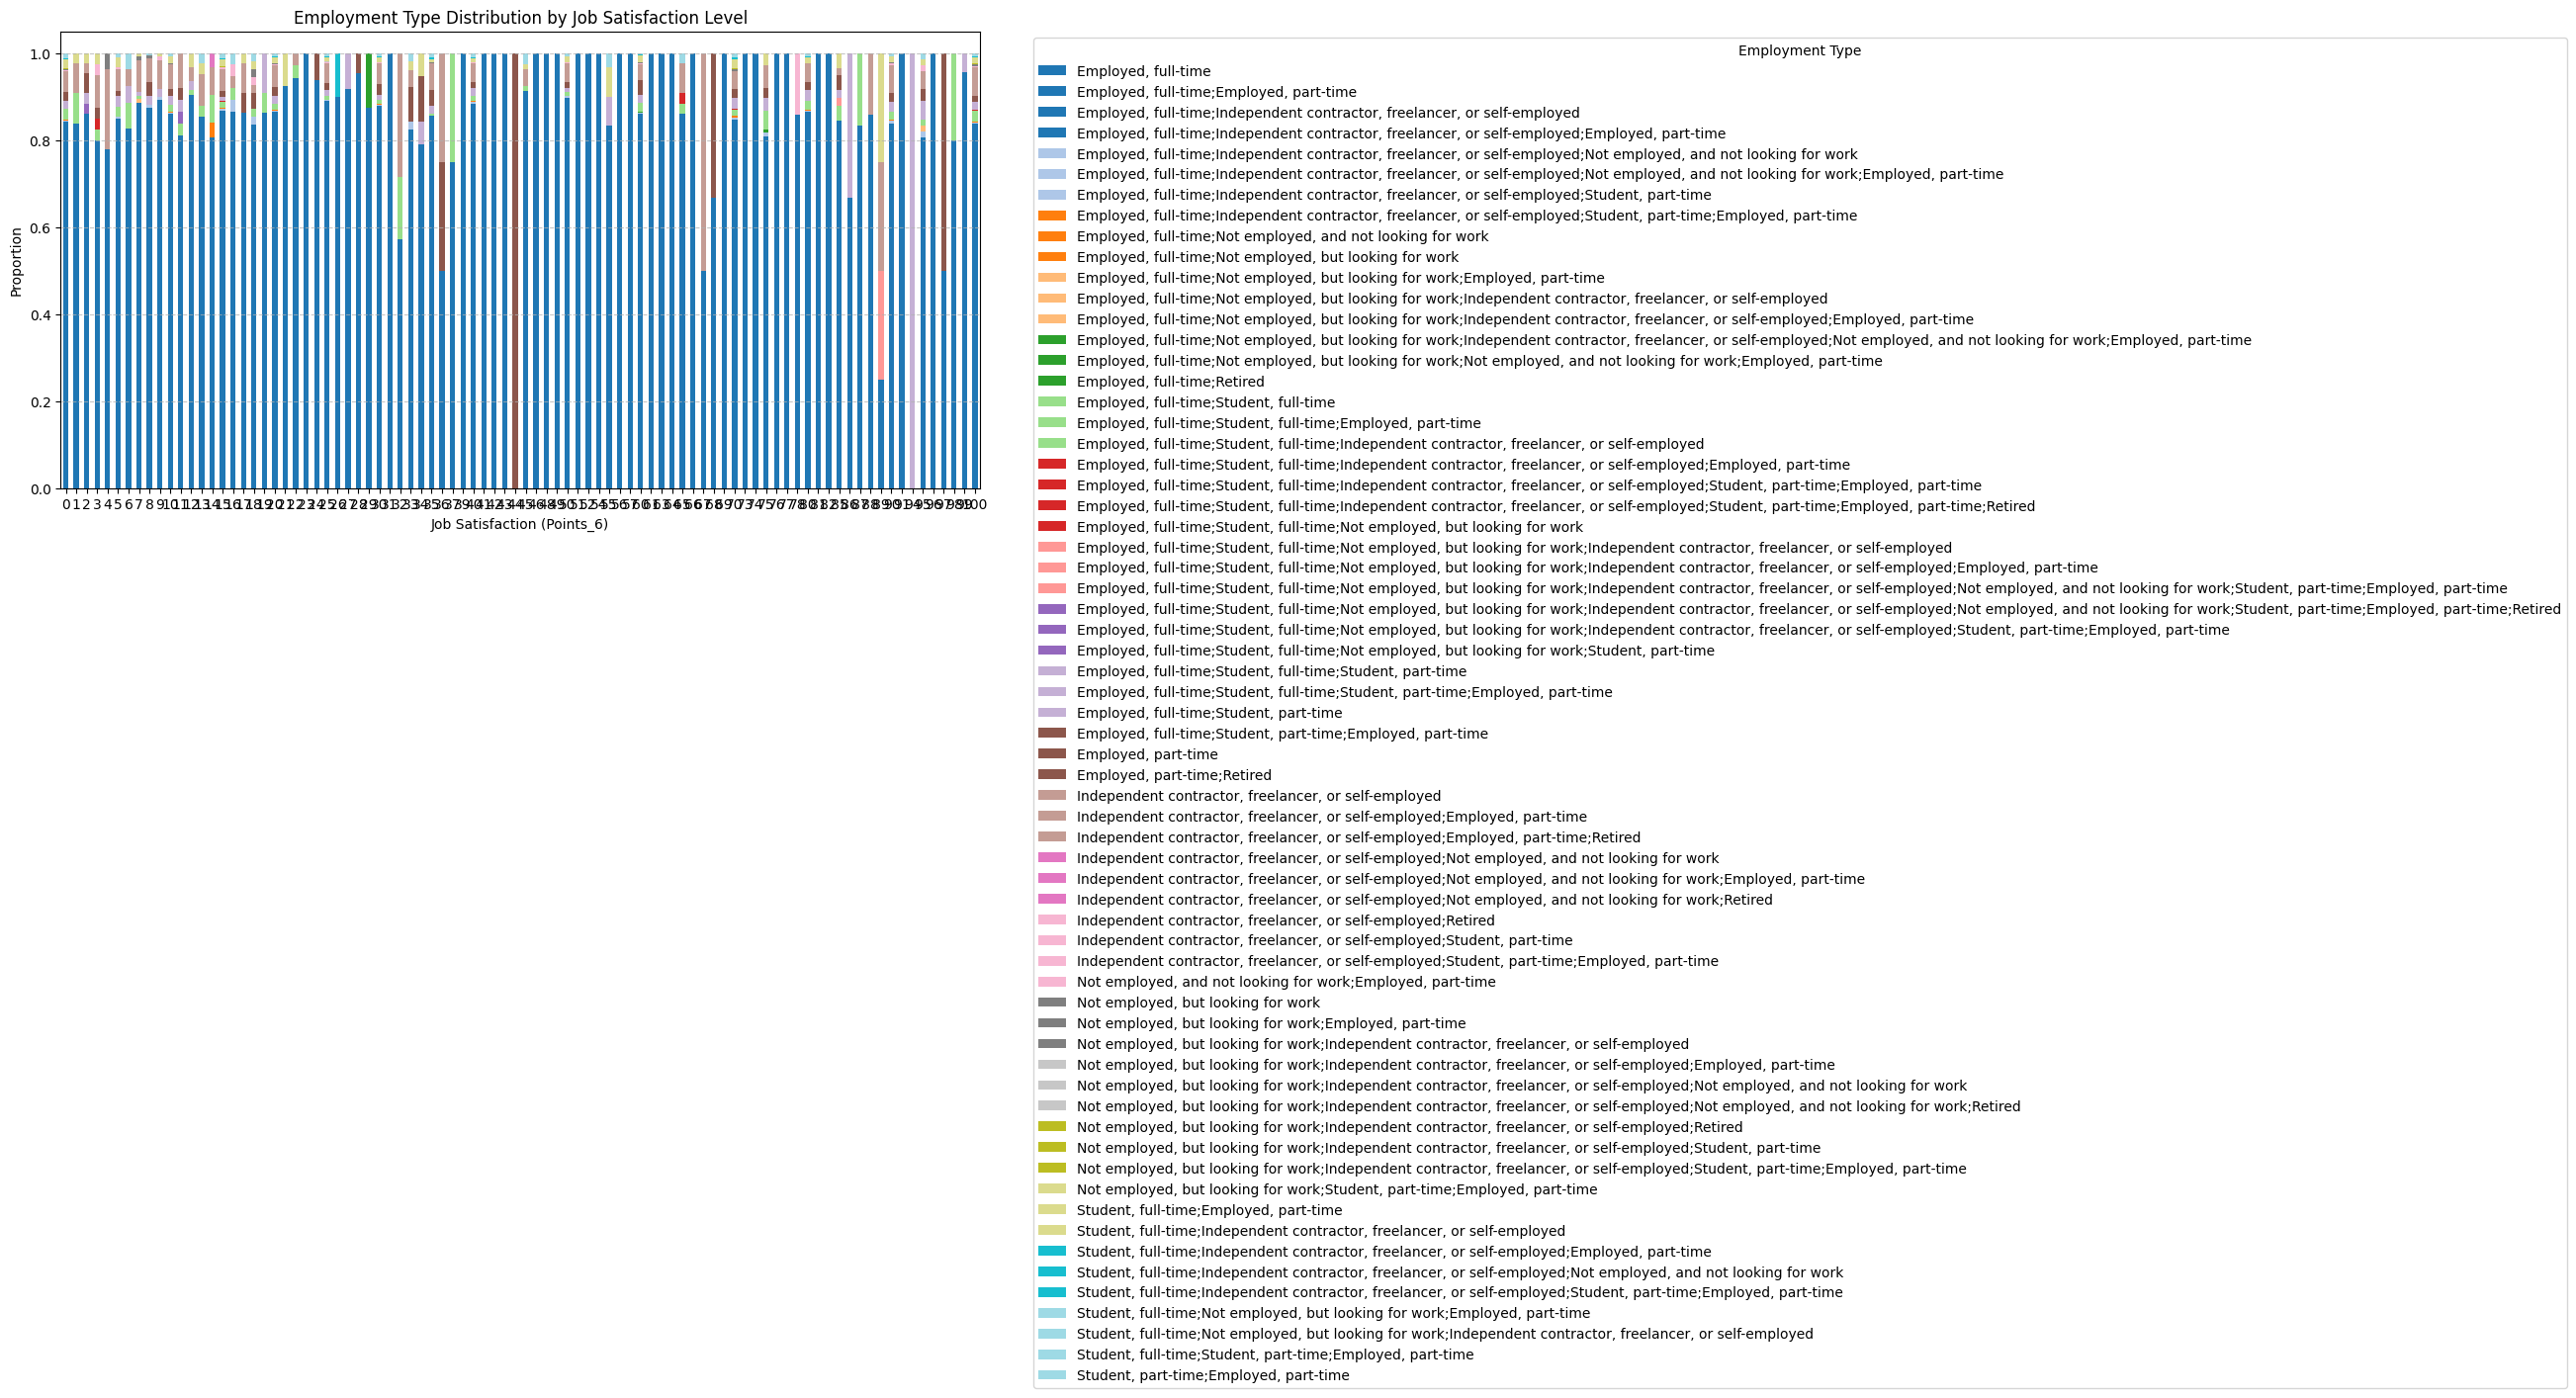

In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in Employment and JobSatPoints_6
df_filtered = df[['Employment', 'JobSatPoints_6']].dropna()

# Convert JobSatPoints_6 to integer for grouping (if needed)
df_filtered['JobSatPoints_6'] = df_filtered['JobSatPoints_6'].astype(int)

# Group by Job Satisfaction and Employment Type, then count
grouped = df_filtered.groupby(['JobSatPoints_6', 'Employment']).size().unstack(fill_value=0)

# Optional: Normalize by JobSatPoints_6 to show proportions
grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)

# Plot stacked bar chart
grouped_prop.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title("Employment Type Distribution by Job Satisfaction Level")
plt.xlabel("Job Satisfaction (Points_6)")
plt.ylabel("Proportion")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


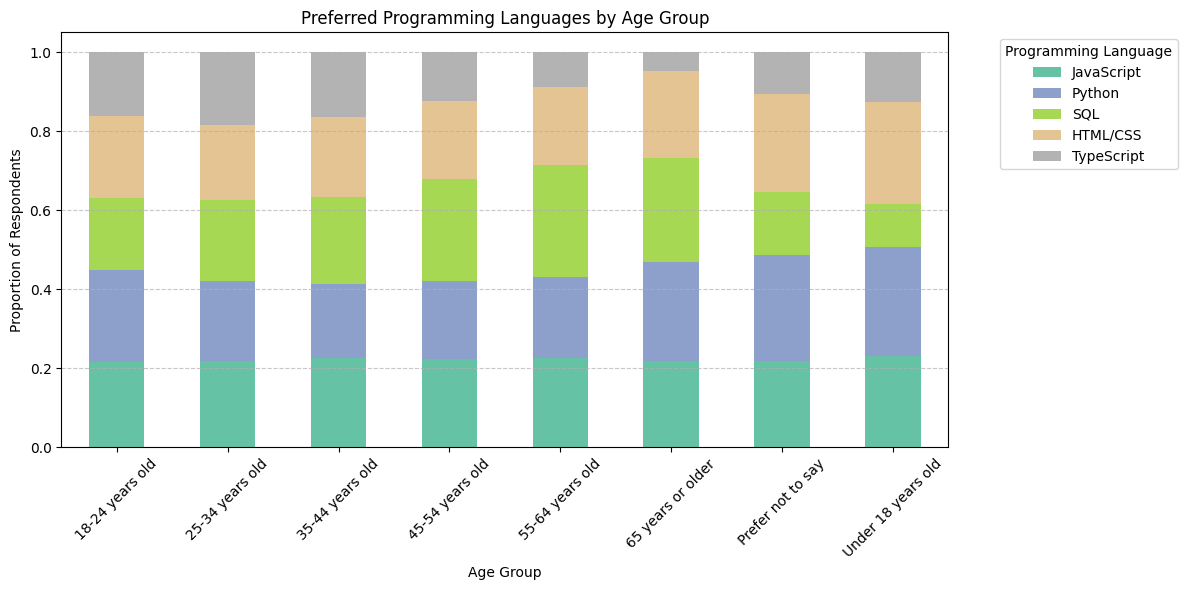

In [13]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop missing values
df_filtered = df[['Age', 'LanguageAdmired']].dropna()

# Explode multiple languages
df_filtered['LanguageAdmired'] = df_filtered['LanguageAdmired'].str.split(';')
df_exploded = df_filtered.explode('LanguageAdmired')

# Group by Age and LanguageAdmired
grouped = df_exploded.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Focus only on top 5 admired languages overall
top_languages = df_exploded['LanguageAdmired'].value_counts().nlargest(5).index
grouped_top = grouped[top_languages]

# Normalize to get proportions within each Age group
grouped_prop = grouped_top.div(grouped_top.sum(axis=1), axis=0)

# Plot stacked chart
grouped_prop.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("Preferred Programming Languages by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Programming Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Drop missing values in relevant columns
df_filtered = df[['Employment', 'PlatformAdmired']].dropna()

# Split semicolon-separated platforms into separate rows
df_filtered['PlatformAdmired'] = df_filtered['PlatformAdmired'].str.split(';')
df_exploded = df_filtered.explode('PlatformAdmired')

# Count admired platforms by employment type
platform_counts = df_exploded.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Select top 5 admired platforms overall
top_platforms = df_exploded['PlatformAdmired'].value_counts().nlargest(5).index
platform_top = platform_counts[top_platforms]

# Normalize to show proportion within each employment group
platform_prop = platform_top.div(platform_top.sum(axis=1), axis=0)

# Plot the stacked bar chart
platform_prop.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title("Technology Adoption (Admired Platforms) by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Proportion of Respondents")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Platform Admired", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


/tmp/ipykernel_1544/2918015622.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
